The spelled-out intro to language modeling: building makemore

https://youtu.be/PaCmpygFfXo?si=INe4CQOTPRjIL1u4

https://github.com/karpathy/makemore

https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb

For practice:
https://docs.pytorch.org/tutorials/beginner/nlp/pytorch_tutorial.html

https://docs.pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

https://cs231n.github.io/python-numpy-tutorial/

Exercises:
E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?

E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?

E06: meta-exercise! Think of a fun/interesting exercise and complete it.

In [207]:
words = open('names.txt', 'r').read().splitlines()

In [208]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [209]:
len(words)

32033

In [210]:
min(len(w) for w in words)

2

In [211]:
max(len(w) for w in words)

15

In [212]:
# start from Bigram LM
# create a dictionary to count bigrams
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>'] # <S> special start char, <E> special end char
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
    # print(ch1, ch2)

In [213]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [214]:
sorted(b.items(), key=lambda kv: -kv[1]) # reverse sorting

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [215]:
# it is more convinient to store data in 2d array
import torch

In [216]:
a = torch.zeros((3, 5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [217]:
a.dtype # by default torch array data type is float32

torch.int32

In [218]:
a[1,3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [219]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [220]:
# let's construct a lookup table for characters
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [221]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>'] # <S> special start char, <E> special end char
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [222]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [223]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

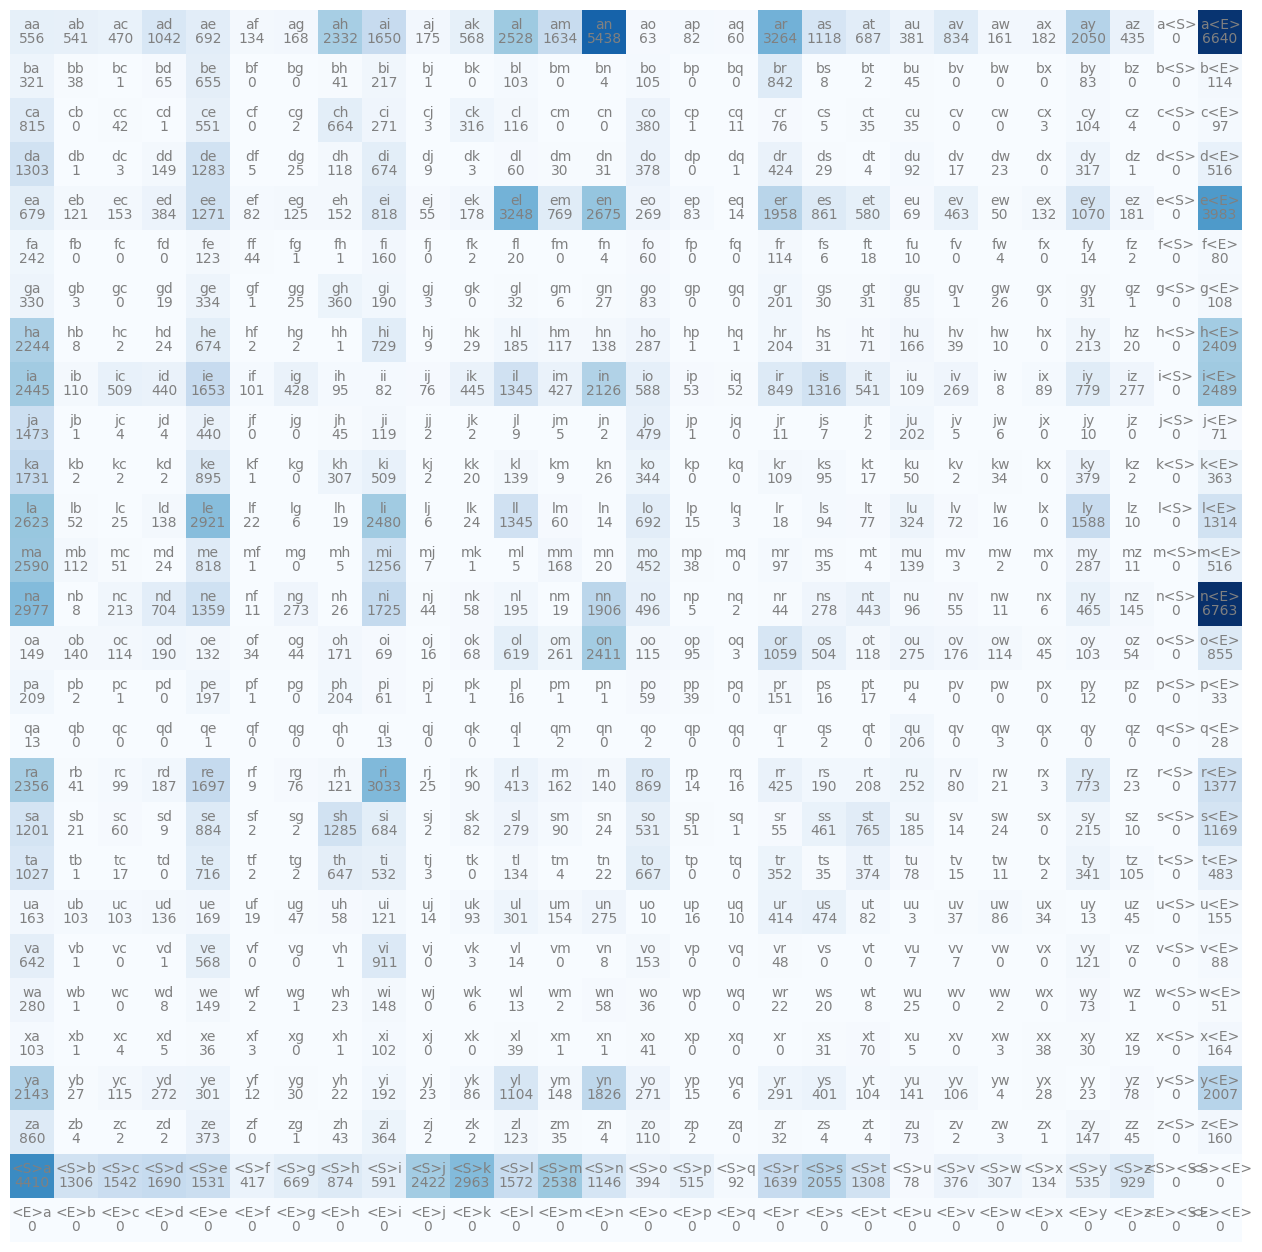

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow(N)

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [225]:
# as you can see from the above visualization - we have a column with 0 for <S>
# and the last row has <E> with all 0 to fix this we are going to rebuild our dataset
N = torch.zeros((27, 27), dtype=torch.int32)

In [226]:
# let's construct a lookup table for characters
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 # set a special char . to position 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [227]:
for w in words:
  chs = ['.'] + list(w) + ['.'] # <S> special start char, <E> special end char
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

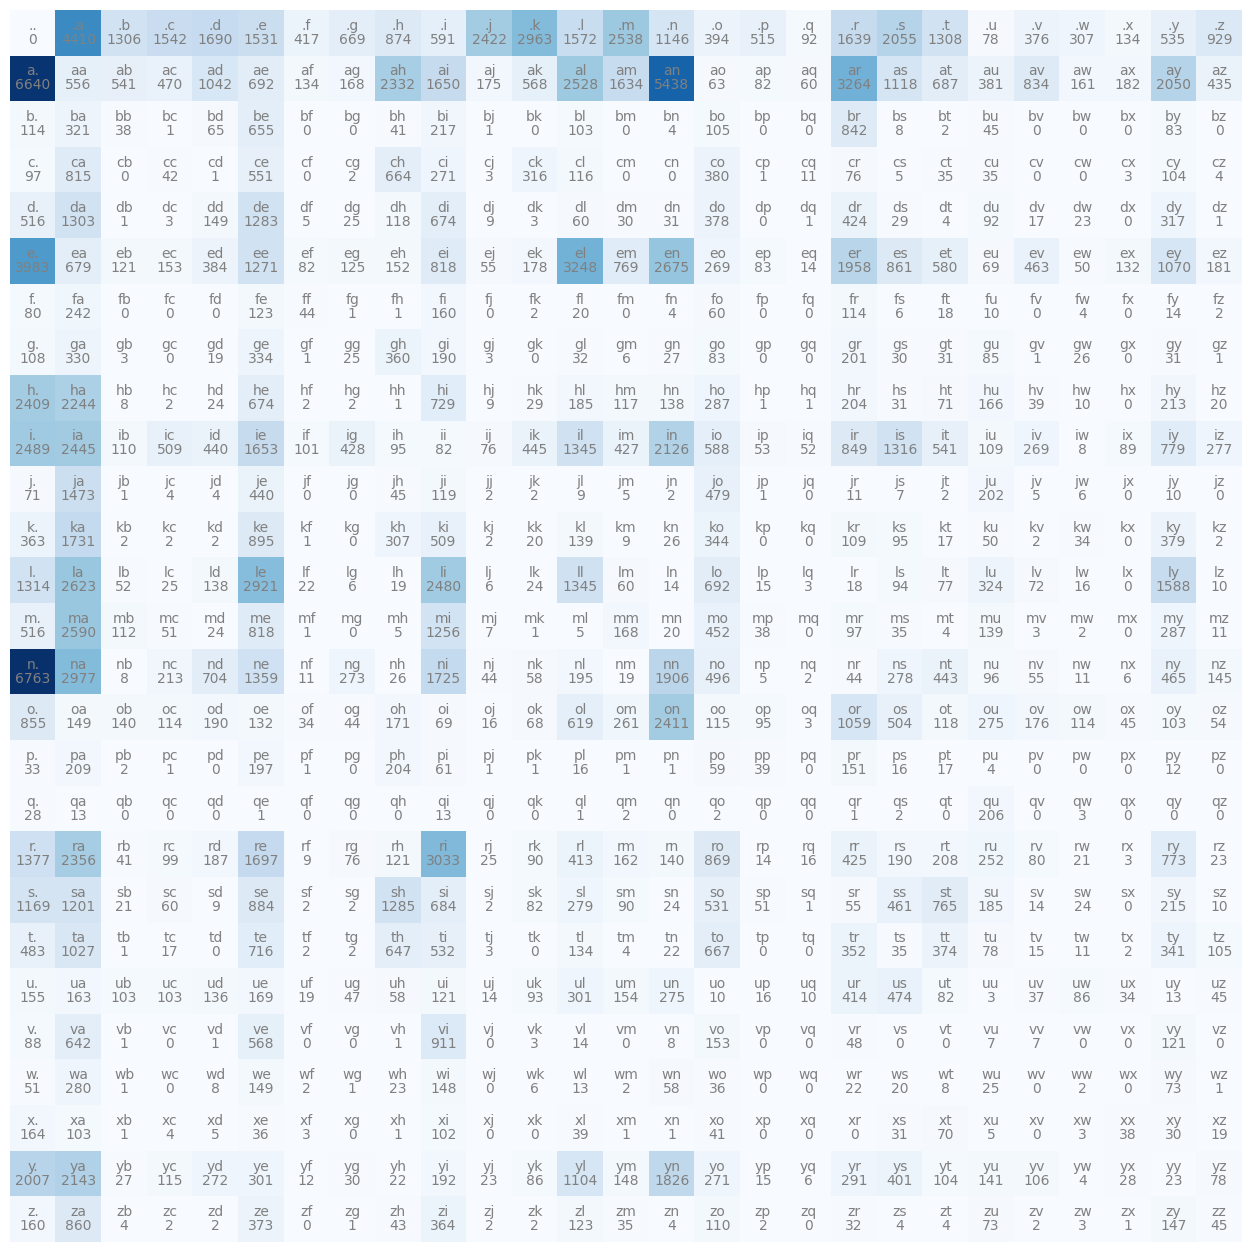

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow(N)

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [229]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [230]:
# we need to create probabilities from counts
p = N[0].float()
# now we need to normalize
p = p / p.sum()
p
# now it is a list of probabilities, p.sum() == 1

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

To get deterministic result we will use generator from torch.

In the context of PyTorch, deterministic generally refers to ensuring that the same inputs produce the same outputs every time you run your code, regardless of hardware or execution order. This is especially important for reproducibility in deep learning experiments.

In [231]:
# g = torch.Generator().manual_seed(2147483647)
# p = torch.rand(3, generator=g)
# p = p / p.sum()
# p

# 0.6064 = 60% => 0
# 0.3033 = 30% => 1
# 0.0903 = 9% => 2
# see cell below

In [232]:
# torch.multinomial(p, num_samples=20, replacement=True, generator=g)

In [233]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # index
itos[ix]

'j'

In [234]:
# P = N.float()
P = (N+1).float()
# N + 1 **model smoothing** the model, eg try non existing name and its
#probability will be inf, it will remove 0 from the probability table

# P.sum() => produce a count of everything (one number)
# P.shape
# P.sum(0, keepdim=True).shape

# see sum documentation from torch
# we want to sum across rows
P /= P.sum(1, keepdim=True)

# 27, 27
# 27,  1

In [235]:
# eg Broadcasting bug => create a garbage in the end!!!!
# P = N.float()
# P /= P.sum(1)

# P.sum(1).shape
# 27
# broadcasting
# 27, 27 /
#     27
# internally it will create 1, 27 for P.sum(1)
# it is actually normalizing rows instead of the columns!!!
# ALWAYS RESPECT BROADCASTING!!!

27 / 27

is it safe to do 27, 27 / 27,1?

see broadcasting rules

https://docs.pytorch.org/docs/stable/notes/broadcasting.html

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

We need to align 2 arrays and their shapes!

27 , 27

27 ,  1

In [236]:
P[0].sum() # expected 1

tensor(1.)

In [237]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  ix = 0
  out = []
  while True:
    # commented because of =>1
    # this is inneficient way!
    #p = N[ix].float()
    #p = p / p.sum()

    p = P[ix]

    # this is uniform distribution and makes everything equally likely
    # +=>1
    # p = torch.ones(27) / 27

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    # print(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

# result looks terrible, because Bigram model is terrible :/
# =>1

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [238]:
# lets evaluate a quality of this model
# training Loss

log_likelihood = 0.0
n = 0
for w in words[:3]:
  chs = ['.'] + list(w) + ['.'] # <S> special start char, <E> special end char
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    # 1 => 0, less 1 more -...
    # log(a*b*c) = log(a) + log(b) + log(c)
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"{log_likelihood=}")
# we want loss - negative log_likelihood
# lowest it can get 0
nll = -log_likelihood
print(f"{nll=}")
print(f"Average nll: {nll/n}")

.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
.o: 0.0123 -4.3965
ol: 0.0779 -2.5526
li: 0.1774 -1.7293
iv: 0.0152 -4.1845
vi: 0.3508 -1.0476
ia: 0.1380 -1.9807
a.: 0.1958 -1.6305
.a: 0.1376 -1.9835
av: 0.0246 -3.7041
va: 0.2473 -1.3971
a.: 0.1958 -1.6305
log_likelihood=tensor(-38.8086)
nll=tensor(38.8086)
Average nll: 2.4255354404449463


Goal: max likelihood of the data by adjusting parameters (w.r.t. = with respect to)

equivalent to max the log likelihood (because log is monotonic)

equivalent to min the negative log likelihood

equivaletn to min the average negative log likelihood

# lets try an alternative approach, result should be similar

In [239]:
# create the training set of all bigrams (x, y)

# xs = inputs
# ys = targets
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.'] # <S> special start char, <E> special end char
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

# create tensors
# there are 2 methods tensor vs Tensor in torch!
# we want integers
# torch.tensor infers the dtype automatically, while torch.Tensor returns a torch.
# FloatTensor. I would recommend to stick to torch.
# tensor, which also has arguments like dtype, if you would like to change the type.
# https://stackoverflow.com/questions/51911749/what-is-the-difference-between-torch-tensor-and-torch-tensor
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [240]:
xs

tensor([ 0,  5, 13, 13,  1])

In [241]:
ys

tensor([ 5, 13, 13,  1,  0])

In [242]:
# one hot encoding tensor =  is a tensor where each element (often representing
# a class label) is converted into a vector that has:
# - All zeros, except a 1 at the index corresponding to the class.
# torch.functional.one_hot
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [243]:
xenc.shape

torch.Size([5, 27])

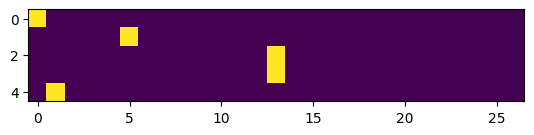

In [244]:
plt.imshow(xenc)

In [245]:
xenc.dtype

torch.float32

In [246]:
# lets construct the first neuron
# W = torch.randn((27, 1))
# xenc @ W # here @ is matrix multiplication
# (5,27) @ (27,1) = (5,1)

# we want 27 neurons
W = torch.randn((27, 27))
xenc @ W # here @ is matrix multiplication (5,27)

tensor([[-0.2466, -0.7393, -0.8154, -0.0979,  0.7469,  0.2738,  0.6288,  2.2807,
          0.0335, -0.3002, -0.2398,  0.1031, -0.1636, -0.4379,  2.0785,  0.3690,
          0.7370,  0.8861, -0.1552,  0.7689,  1.6703,  0.3458,  0.5171,  0.4996,
         -1.7484, -0.5330,  0.4276],
        [-1.3191, -0.6660,  0.7317,  0.5061, -0.7680, -0.0932, -0.2865,  1.1075,
         -0.2295,  0.5288,  0.8549,  1.4816,  0.1811, -0.6647, -0.6816,  0.1105,
          0.2633,  0.2849,  0.3451, -0.5992, -0.7281, -0.0286,  0.3563,  0.9746,
          0.3561, -2.5782, -1.4672],
        [-0.2969,  1.1839,  0.9184, -0.5392, -0.3788,  0.4992,  0.0731, -0.8237,
         -0.7764, -1.2124,  1.7141, -1.1741, -0.2169, -1.4140,  0.5946, -0.0692,
          0.1641,  0.6089,  0.4003,  0.0247,  0.1343, -0.2337,  1.4344, -1.8611,
         -0.3703, -0.0718, -2.0757],
        [-0.2969,  1.1839,  0.9184, -0.5392, -0.3788,  0.4992,  0.0731, -0.8237,
         -0.7764, -1.2124,  1.7141, -1.1741, -0.2169, -1.4140,  0.5946, -0.0692

In [247]:
(xenc @ W).shape

torch.Size([5, 27])

In [248]:
# (5, 27) @ (27, 27) = (5, 27)

# we are going to take numbers and we will exp them,
# negative numbers will be numbers below 1
# positive numbers will be above 1
# we can use exp results and inteprete them as counts for chars

In [249]:
logits = (xenc @ W) # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0150, 0.0092, 0.0085, 0.0174, 0.0405, 0.0252, 0.0359, 0.1875, 0.0198,
         0.0142, 0.0151, 0.0212, 0.0163, 0.0124, 0.1532, 0.0277, 0.0401, 0.0465,
         0.0164, 0.0414, 0.1018, 0.0271, 0.0321, 0.0316, 0.0033, 0.0112, 0.0294],
        [0.0078, 0.0151, 0.0609, 0.0486, 0.0136, 0.0267, 0.0220, 0.0887, 0.0233,
         0.0498, 0.0689, 0.1290, 0.0351, 0.0151, 0.0148, 0.0327, 0.0382, 0.0390,
         0.0414, 0.0161, 0.0142, 0.0285, 0.0419, 0.0777, 0.0419, 0.0022, 0.0068],
        [0.0213, 0.0935, 0.0717, 0.0167, 0.0196, 0.0472, 0.0308, 0.0126, 0.0132,
         0.0085, 0.1590, 0.0089, 0.0231, 0.0070, 0.0519, 0.0267, 0.0337, 0.0526,
         0.0427, 0.0293, 0.0327, 0.0227, 0.1202, 0.0045, 0.0198, 0.0266, 0.0036],
        [0.0213, 0.0935, 0.0717, 0.0167, 0.0196, 0.0472, 0.0308, 0.0126, 0.0132,
         0.0085, 0.1590, 0.0089, 0.0231, 0.0070, 0.0519, 0.0267, 0.0337, 0.0526,
         0.0427, 0.0293, 0.0327, 0.0227, 0.1202, 0.0045, 0.0198, 0.0266, 0.0036],
        [0.1058, 0.0263,

In [250]:
probs.shape

torch.Size([5, 27])

In [251]:
probs[0].sum()

tensor(1.)

# Summary

In [252]:
xs

tensor([ 0,  5, 13, 13,  1])

In [253]:
ys

tensor([ 5, 13, 13,  1,  0])

In [254]:
# random init 27 neurons's weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [255]:
# forward path
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # predict log-counts, @ matrix multiplication
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next char
# btw: the 2 last lines here together are called softmax (normalization fn)

In [256]:
probs.shape

torch.Size([5, 27])

In [257]:
from logging import log
nlls = torch.zeros(5)
for i in range(5):
  # for i-th bigram
  x = xs[i].item() # input char index
  y = ys[i].item() # label char index
  print("------------")
  print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})")
  print("input to the neural net: {x}")
  print("output probabilities from the neural net: ", probs[i])
  print("label (actual  next character): {y}")
  p = probs[i, y]
  print(f"probability assigned by the net to the correct char: {p.item():.4f}")
  logp = torch.log(p)
  print(f"log lilihood: {logp}")
  nll = -logp
  print(f"negative log likelihood: {nll.item()}")
  nlls[i] = nll

print("===============")
print("average negative log likelihood, i.e. loss = ", nlls.mean().item())

------------
bigram example 1: .e (indexes 0,5)
input to the neural net: {x}
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual  next character): {y}
probability assigned by the net to the correct char: 0.0123
log lilihood: -4.399273872375488
negative log likelihood: 4.399273872375488
------------
bigram example 2: em (indexes 5,13)
input to the neural net: {x}
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual  next character): {y}
probability assigned by the net to the correct char: 0.0181
log lilih

# OPTIMIZATION manual

In [258]:
xs

tensor([ 0,  5, 13, 13,  1])

In [259]:
ys

tensor([ 5, 13, 13,  1,  0])

In [260]:
# random init 27 neurons's weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [261]:
probs.shape

torch.Size([5, 27])

In [262]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # predict log-counts, @ matrix multiplication
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next char
# btw: the 2 last lines here together are called softmax (normalization fn)

In [263]:
# code is similar to micrograd
# probs[0, 5], probs[1, 13], probs[2,13], probs[3,1], probs[4, 0]
# is similar to => vectorized form the same expression
loss = -probs[torch.arange(5),ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [264]:
print(loss.item())

3.7693049907684326


In [265]:
# backwawrd pass
W.grad = None # is more efficient than set it to 0
loss.backward()

In [266]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [267]:
W.grad.shape

torch.Size([27, 27])

In [268]:
# update
# re-calculate forward pass after it and loss will go lower
W.data += -0.1 * W.grad

# OPTIMIZATION auto

In [273]:
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.'] # . is special char
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# init the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [275]:
# gradient descent
for k in range(100):
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W # predict log-counts, @ matrix multiplication
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next char
  # btw: the 2 last lines here together are called softmax (normalization fn)
  loss = -probs[torch.arange(num),ys].log().mean() # + 0.01*(W**2).mean() #<= similar to smoothing see above
  print(loss.item())

  # backward pass
  W.grad = None # is more efficient than set it to 0
  loss.backward()

  # update
  W.data += -50 * W.grad

2.4726526737213135
2.4724340438842773
2.4722204208374023
2.472010850906372
2.471806049346924
2.4716053009033203
2.471409320831299
2.4712166786193848
2.4710280895233154
2.4708433151245117
2.4706623554229736
2.4704854488372803
2.4703118801116943
2.4701414108276367
2.4699742794036865
2.4698104858398438
2.46964955329895
2.469492197036743
2.4693377017974854
2.4691860675811768
2.469036817550659
2.468891143798828
2.468747615814209
2.46860671043396
2.468468427658081
2.468332529067993
2.4681990146636963
2.4680681228637695
2.4679393768310547
2.4678127765655518
2.467688798904419
2.4675662517547607
2.4674463272094727
2.4673283100128174
2.467212438583374
2.467097759246826
2.4669857025146484
2.4668753147125244
2.466766834259033
2.4666595458984375
2.4665544033050537
2.466451406478882
2.4663491249084473
2.4662492275238037
2.4661502838134766
2.4660532474517822
2.4659576416015625
2.4658634662628174
2.4657704830169678
2.465679407119751
2.4655895233154297
2.465500593185425
2.4654135704040527
2.46532726287

In [278]:
# sample from the model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  ix = 0
  out = []
  while True:
    # BEFORE:
    # p = P[ix]
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts, @ matrix multiplication
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdim=True) # probabilities for next char

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    # print(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

# and we get the same result using a different approach :)
# the problem with this model that it only takes one char for context to produce
# new result

junide.
janasah.
prelay.
a.
nn.
